In [1]:
import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import Model_Arch as arch
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Create Test Generator

In [4]:
import os
import pandas as pd

In [5]:
rootpath = './Dataset/test/'

In [6]:
image_path_list = []
image_labels = []

for label in tqdm(os.listdir(rootpath)):
    for img in os.listdir(rootpath + label):
        image_path = rootpath + label + '/' + img
        image_path_list.append(image_path)
        image_labels.append(int(label))
        
df_test = pd.DataFrame({"filepath" : image_path_list, "label": image_labels})
df_test = df_test.sample(frac=1)

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 103.67it/s]


In [7]:
df_test.head()

,filepath,label
99,./Dataset/test/0/Image_3509.jpg,0
297,./Dataset/test/0/Image_7737.jpg,0
380,./Dataset/test/1/Image_4388.jpg,1
691,./Dataset/test/3/Image_3775.jpg,3
477,./Dataset/test/2/Image_1965.jpg,2


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783 entries, 99 to 509
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filepath  783 non-null    object
 1   label     783 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 18.4+ KB


In [9]:
class TestImageGenerator():

    def __init__(self, target_size, batch_size, class_mode):
        self.target_size = target_size
        self.batch_size = batch_size
        self.class_mode = class_mode
        
    def TestGenerator(self):
        test_idg = image.ImageDataGenerator(
            rescale = 1./255,
        )

        test_generator = test_idg.flow_from_dataframe(
            dataframe = df_test,
            directory = None,
            x_col = "filepath",
            y_col = "label",
            target_size = self.target_size,
            batch_size = self.batch_size,
            class_mode = self.class_mode
        )

        return test_generator

In [10]:
testimgGenerator = TestImageGenerator((224,224),4,'raw')
test_generator = testimgGenerator.TestGenerator()

Found 783 validated image filenames.


## Test Model

In [11]:
model_class = arch.BuildModel()
OsteoArthNet = model_class.OsteoArthNet()

In [12]:
OsteoArthNet.load_weights('./Model_Checkpoints/ostroarthnet/ostroarthnet.ckpt')

In [13]:
y_pred = OsteoArthNet.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

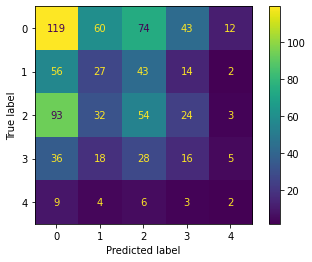

In [14]:
cm = confusion_matrix(df_test.label, y_pred, labels=[0, 1, 2, 3, 4])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0, 1, 2, 3, 4])
disp.plot()
plt.show()

In [15]:
acc=sum((y_pred==df_test.label))/len(y_pred)

In [16]:
acc

0.2784163473818646